In [1]:
import pandas as pd
import itertools
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import collections
import warnings
warnings.filterwarnings('ignore')

In [2]:
x_test = np.load('./data/regression_x_test.npy')
x_train = np.load('./data/regression_x_train.npy')
y_train = np.load('./data/regression_y_train.npy')

Посмотрим на то, что лежит в датасетах:

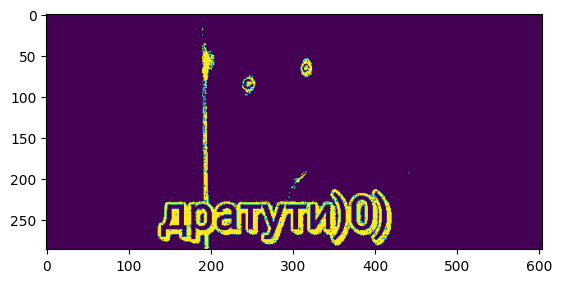

In [3]:
plt.imshow(x_train[:, :, 0])
plt.show()

Так как было много проблем с выводом картинок, посмотрим на размерности:

In [4]:
print("Размерности x_train, y_train, x_test: {}, {}, {}".format(x_train.shape, y_train.shape, x_test.shape))

Размерности x_train, y_train, x_test: (286, 604, 35), (286, 604), (420, 620, 35)


Вытягиваем все в вектора:

In [5]:
x_train = np.reshape(x_train, (x_train.shape[0]*x_train.shape[1], -1))
x_test = np.reshape(x_test, (x_test.shape[0]*x_test.shape[1], -1))
y_train = np.reshape(y_train, (-1))

<Axes: >

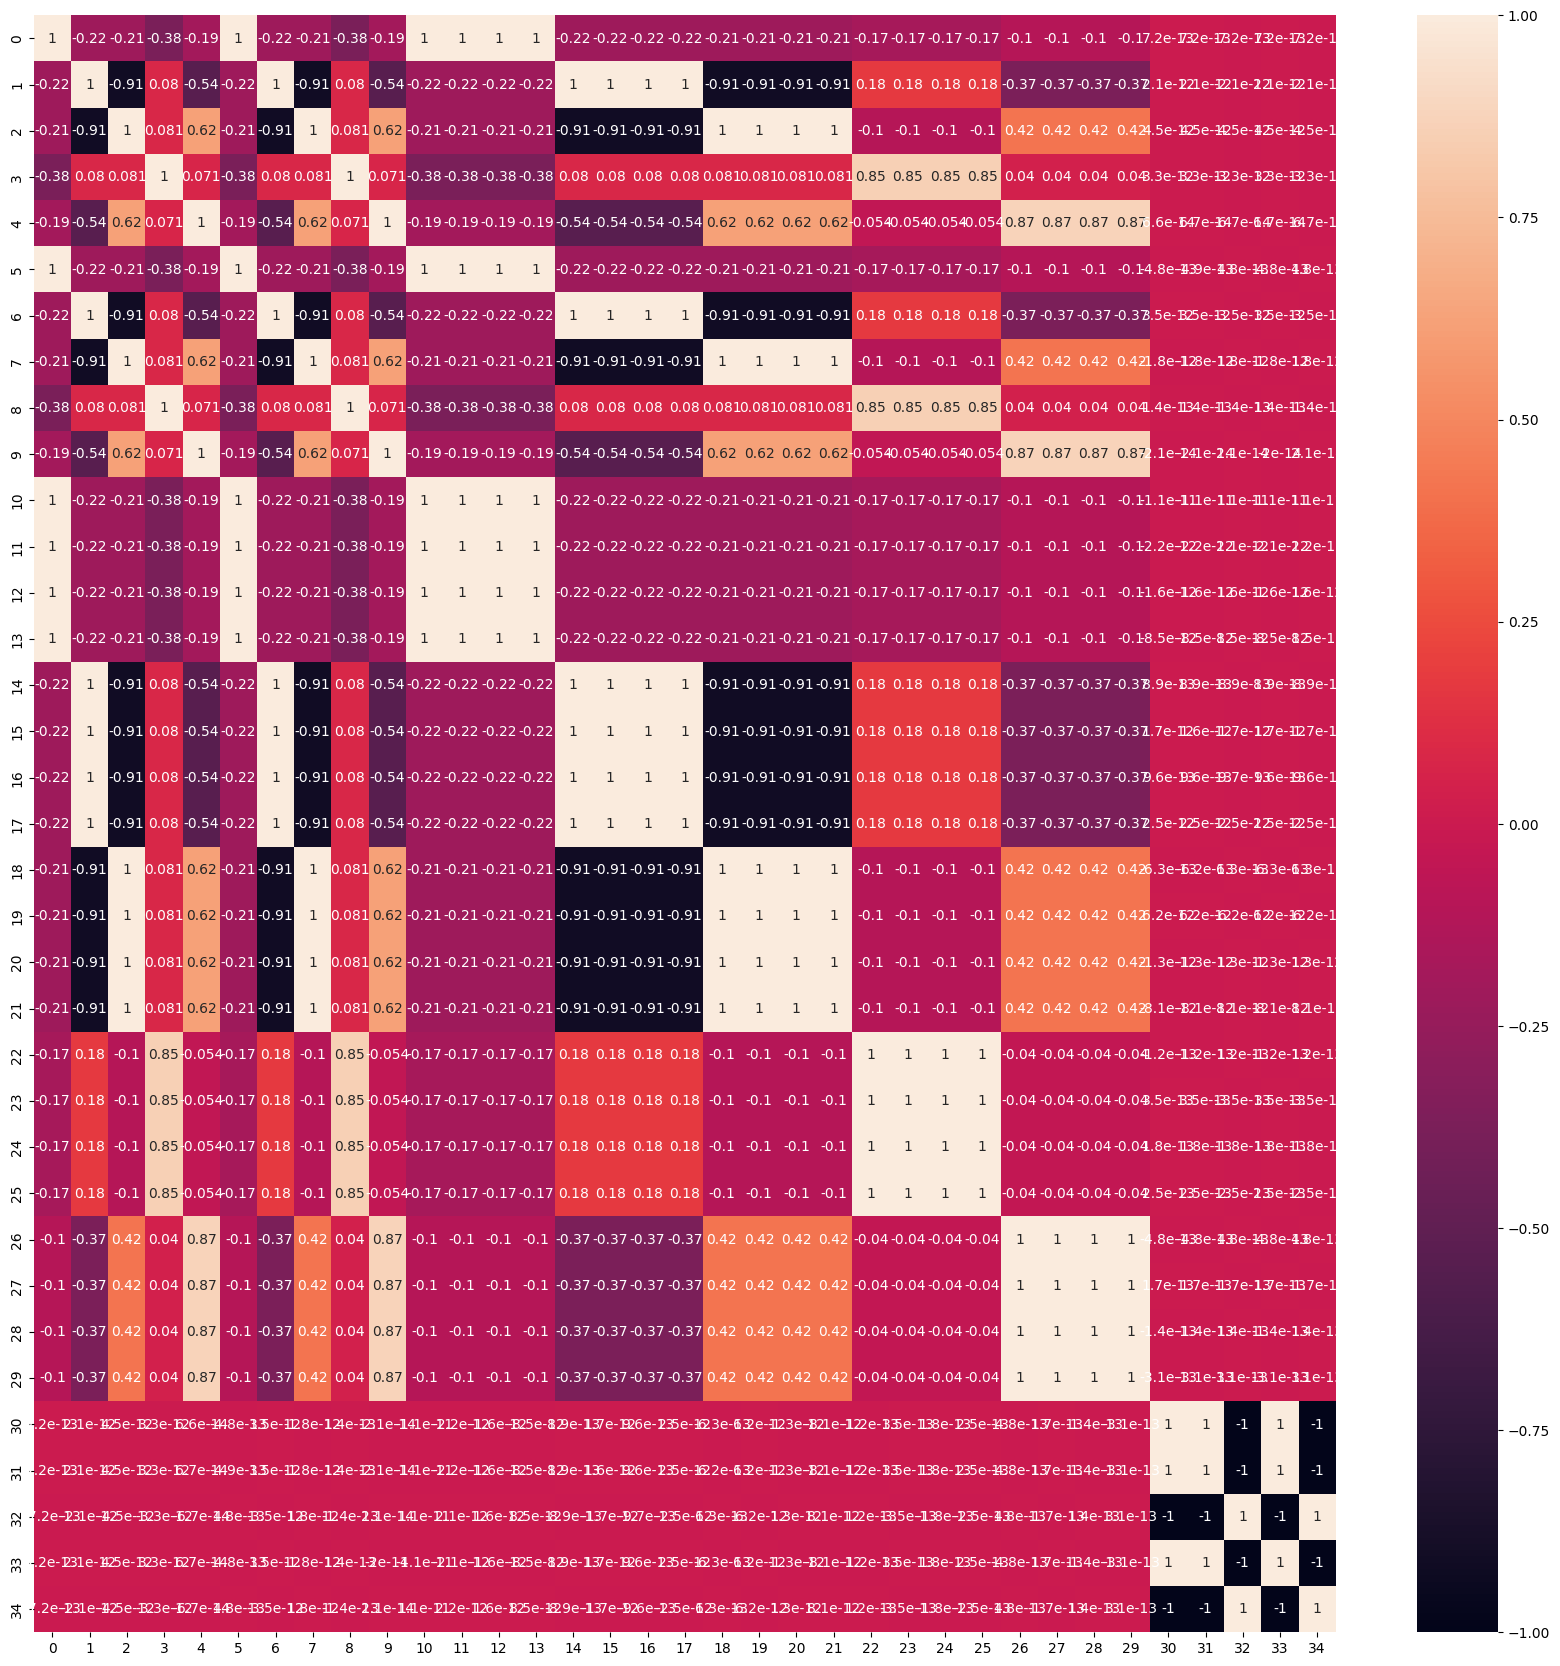

In [6]:
plt.figure(figsize=(21, 21))
sns.heatmap(np.corrcoef(x_train.T), annot=True)

Можно заметить довольно сильную корелляцию между некоторыми признаками. Сделаем ручной отбор с выставленным трешхолдом как в описании задачи:

In [7]:
threshold = 0.85
corr = np.corrcoef(x_train.T)
correlated = []
for i in range(corr.shape[0]):
    for j in range(i):
        if abs(corr[i, j]) >= threshold or abs(corr[i, j]) <= 1e-5:
            correlated.append(i)

<Axes: >

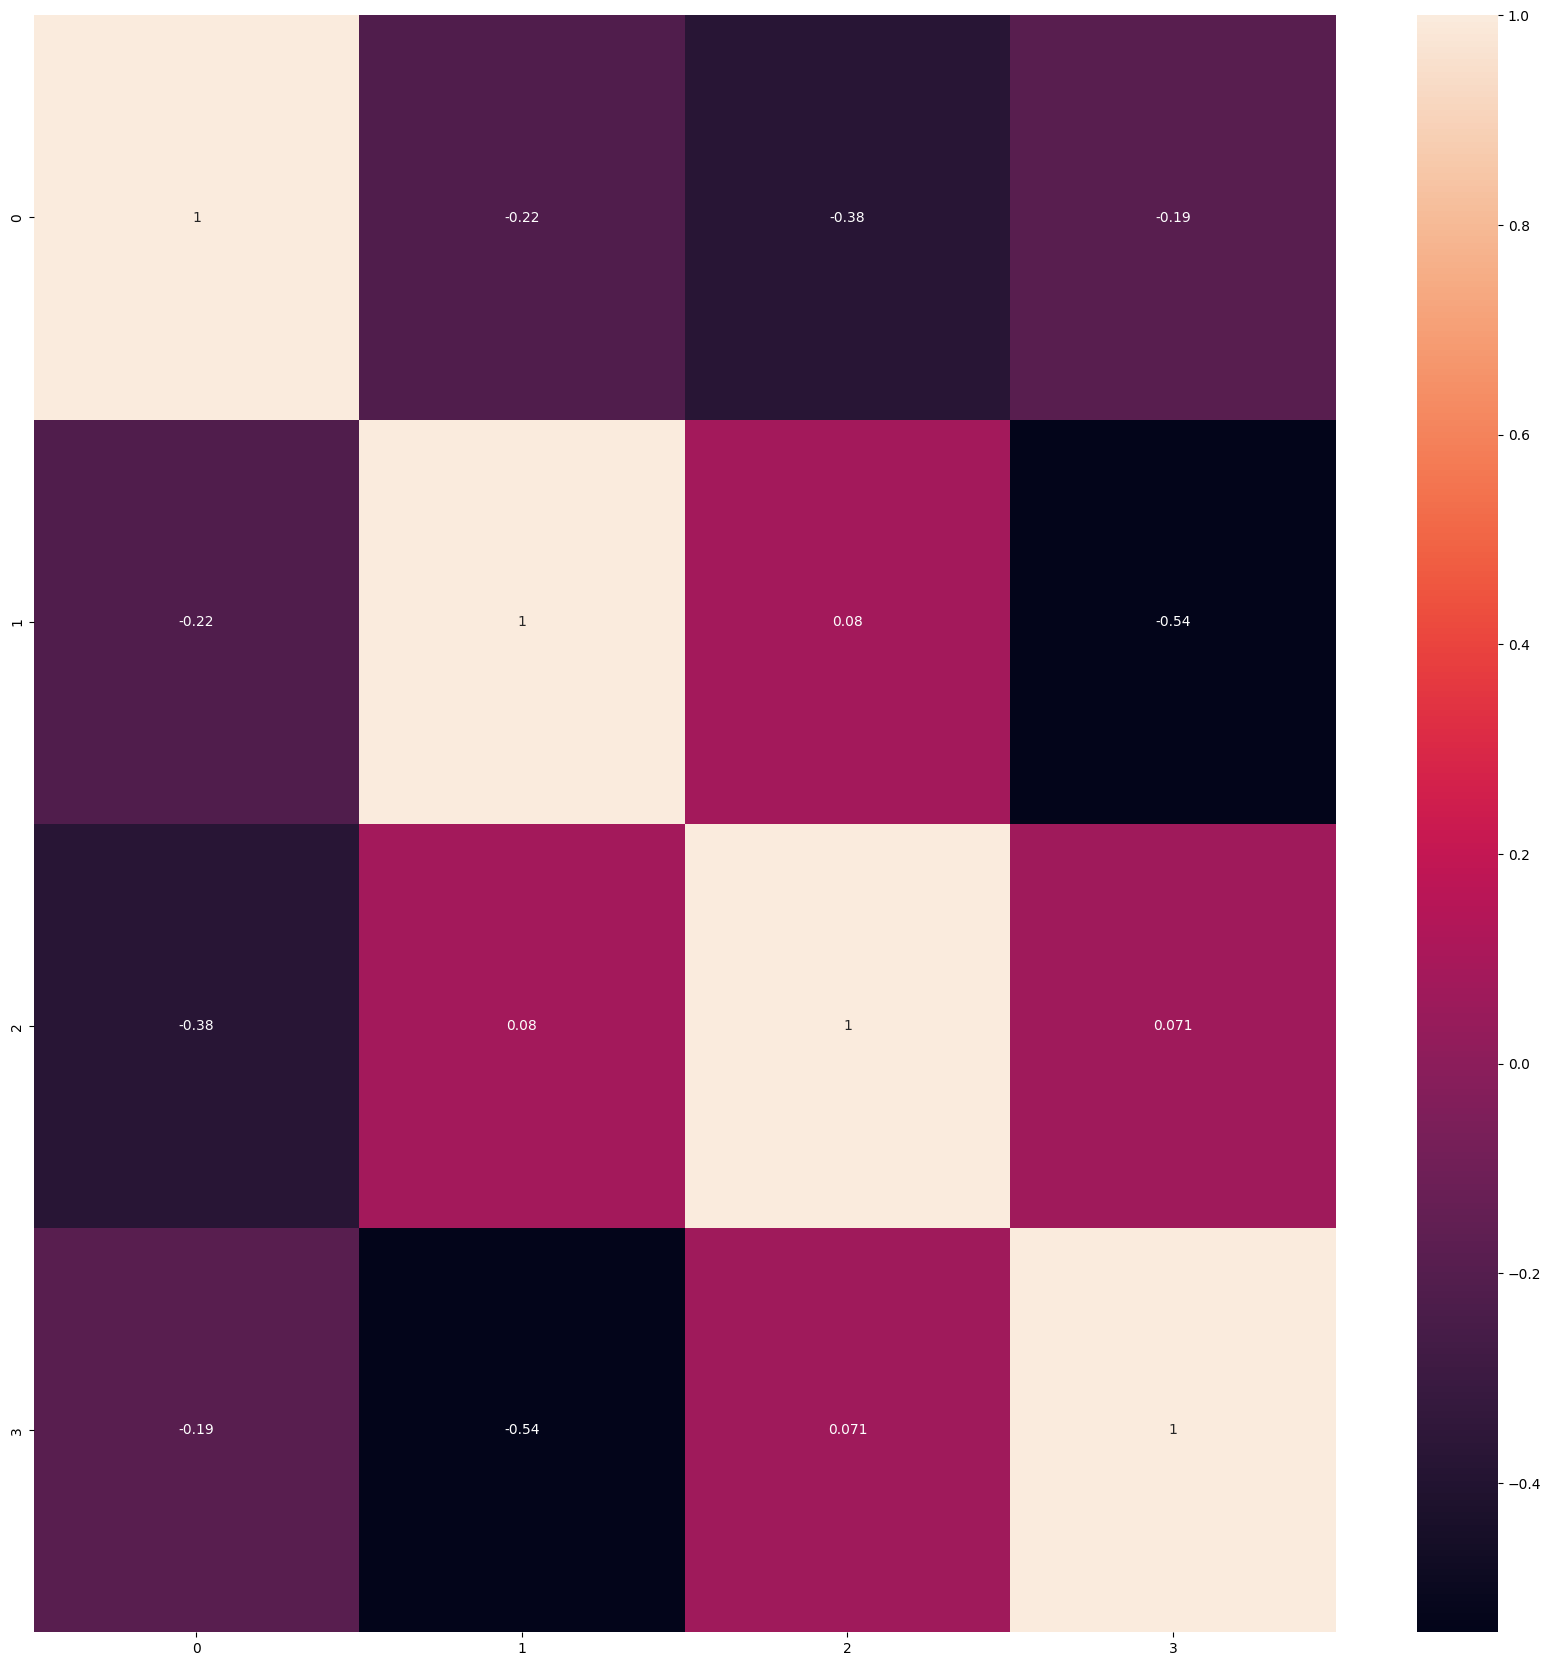

In [8]:
x_train_dropped = np.delete(x_train, list(set(correlated)), axis=1)
x_test_dropped = np.delete(x_test, list(set(correlated)), axis=1)

plt.figure(figsize=(21, 21))
sns.heatmap(np.corrcoef(x_train_dropped.T), annot=True)


Точность 0.6787


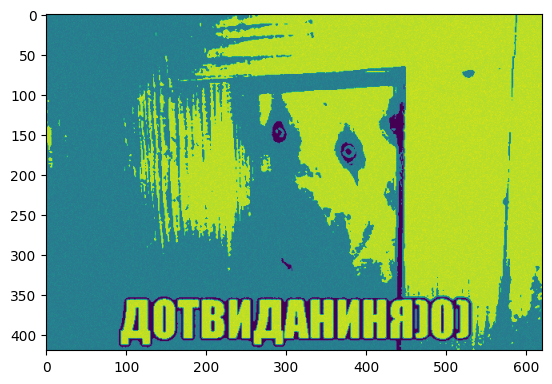

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train_dropped, y_train)
score = model.score(x_train_dropped, y_train)
print('Точность {}'.format(round(score, 4)))

y_test = model.predict(x_test_dropped)
plt.imshow(y_test.reshape(420, 620))
plt.show()

Теперь проверим себя на тесте Фишера (отсечка по значению, меньшему 10):

In [10]:
from sklearn.feature_selection import f_regression

alpha = 0.05
fvalues, pvalues = f_regression(x_train, y_train)

pvalues.sort()
fvalues.sort()
mask = [x for x in fvalues > 10]
x_train = x_train[:, mask]
x_test = x_test[:, mask]


<Axes: >

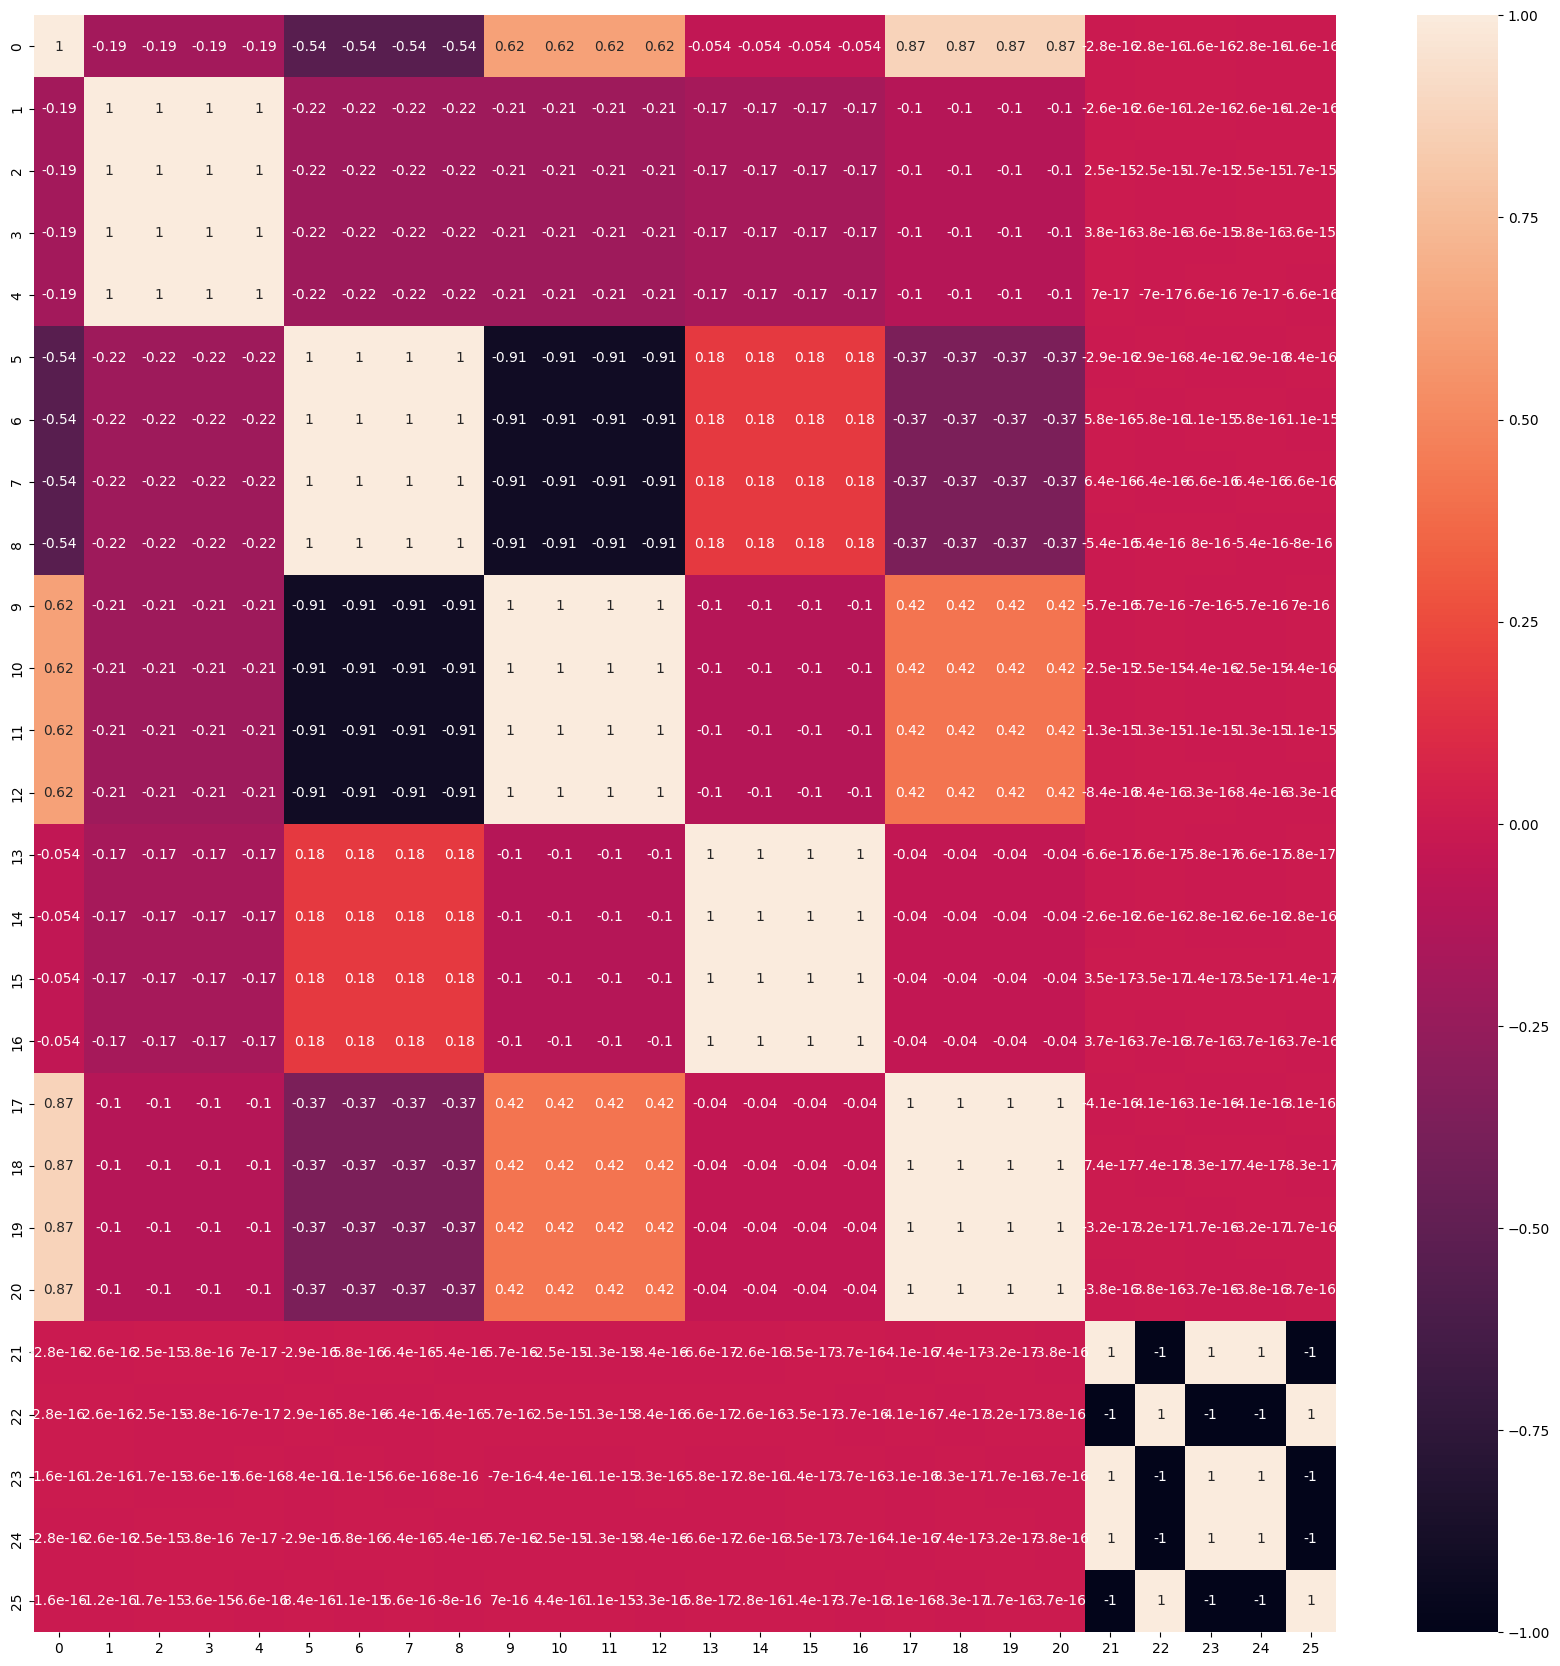

In [11]:
plt.figure(figsize=(21, 21))
sns.heatmap(np.corrcoef(x_train.T), annot=True)

F-test оставил больше признаков, гораздо больше, однако, давайте произведем подсчет точности предсказаний.

Точность: 0.6781


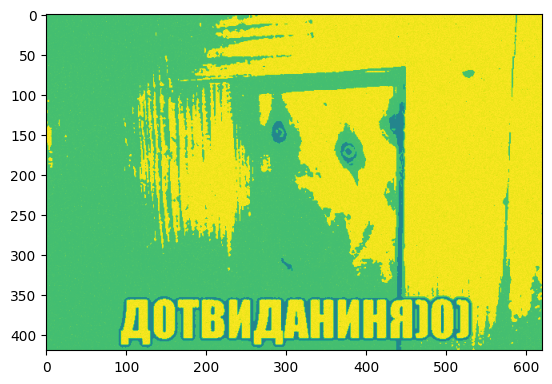

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
score = model.score(x_train, y_train)
print('Точность: {}'.format(round(score, 4)))

y_test = model.predict(x_test)
plt.imshow(y_test.reshape(420, 620))
plt.show()

Критических отличий нет, однако изображение оставляет желать лучшего. Обучим на полных данных:

In [15]:
x_test = np.load('./data/regression_x_test.npy')
x_train = np.load('./data/regression_x_train.npy')
y_train = np.load('./data/regression_y_train.npy')

x_train = np.reshape(x_train, (x_train.shape[0]*x_train.shape[1], -1))
x_test = np.reshape(x_test, (x_test.shape[0]*x_test.shape[1], -1))
y_train = np.reshape(y_train, (-1))

Точность: 0.6814


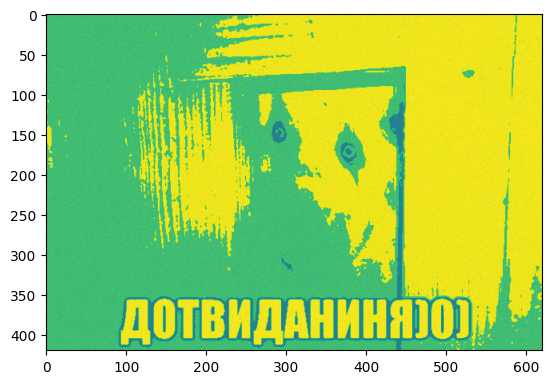

In [16]:
model = LinearRegression()
model.fit(x_train, y_train)
score = model.score(x_train, y_train)
print('Точность: {}'.format(round(score, 4)))

y_test = model.predict(x_test)
plt.imshow(y_test.reshape(420, 620))
plt.show()

Итог: ручной дроп был лучше, так как оставил меньшее число значимых признаков, получив не меньшее качество.